# Compute Features on Original Dataset

In [1]:
# Make sure you are using the cmip6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

sys.path.insert(0, '/glade/u/home/apinard/newldcpy/ldcpy')
import ldcpy

sys.path.insert(0, '/glade/u/home/apinard/lcr')
import lcr

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is edited
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")
import os
hdf_pp = os.environ["HDF5_PLUGIN_PATH"]
env_list = ['export HDF5_PLUGIN_PATH='+hdf_pp]

In [2]:
# start the dask scheduler

# Note: This notebook should run on Cheyenne for now, running on casper will work for
# the most part but trying to plot the LHFLX variable will result in a timeout,
# presumably due to the large file sizes for the variable.

# for Cheyenne

from dask_jobqueue import PBSCluster



cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=9:mem=109GB",
    cores=36,
    processes=9,
    env_extra=env_list
)


# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster

In [4]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.10.19:39027,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [7]:
import time

# monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            # "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
# daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

monthly_variables = ["LHFLX"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research"


# for variable in daily_variables:
#     print(variable)
#     levels[variable] = []
#     sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
#     cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = ["br_1"]
    sets[variable] = [f"{data_path}/monthly_br/br_1/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-203512.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], levels[variable], chunks={"time":700})



LHFLX
dataset size in GB 0.08



In [4]:
import time

monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/"


for variable in daily_variables:
    print(variable)
    levels[variable] = []
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = []
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



FLUT


KeyboardInterrupt: 

In [5]:
# all daily vars
import time

daily_variables = ["bc_a1_SRF", "dst_a1_SRF", "dst_a3_SRF", "FLNS", "FLNSC",
                   "FLUT", "FSNS", "FSNSC", "FSNTOA", "ICEFRAC", "LHFLX", "pom_a1_SRF", "PRECL", "PRECSC",
                   "PRECSL", "PRECT", "PRECTMX", "PSL", "Q200", "Q500", "Q850", "QBOT", "SHFLX", "so4_a1_SRF",
                   "so4_a2_SRF", "so4_a3_SRF", "soa_a1_SRF", "soa_a2_SRF", "T010", "T200", "T500", "T850",
                   "TAUX", "TAUY", "TMQ", "TREFHT", "TREFHTMN", "TREFHTMX", "TS", "U010", "U200", "U500", "U850", "VBOT",
                   "WSPDSRFAV", "Z050", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research"


for variable in daily_variables:
    print(variable)
    levels[variable] = []
    sets[variable] = [f"{data_path}/daily_orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



bc_a1_SRF
dataset size in GB 0.16

dst_a1_SRF
dataset size in GB 0.16

dst_a3_SRF
dataset size in GB 0.16

FLNS
dataset size in GB 0.16

FLNSC
dataset size in GB 0.16

FLUT
dataset size in GB 0.16

FSNS
dataset size in GB 0.16

FSNSC
dataset size in GB 0.16

FSNTOA
dataset size in GB 0.16

ICEFRAC
dataset size in GB 0.16

LHFLX
dataset size in GB 0.16

pom_a1_SRF
dataset size in GB 0.16

PRECL
dataset size in GB 0.16

PRECSC
dataset size in GB 0.16

PRECSL
dataset size in GB 0.16

PRECT
dataset size in GB 0.16

PRECTMX
dataset size in GB 0.16

PSL
dataset size in GB 0.16

Q200
dataset size in GB 0.16

Q500
dataset size in GB 0.16

Q850
dataset size in GB 0.16

QBOT
dataset size in GB 0.16

SHFLX
dataset size in GB 0.16

so4_a1_SRF
dataset size in GB 0.16

so4_a2_SRF
dataset size in GB 0.16

so4_a3_SRF
dataset size in GB 0.16

soa_a1_SRF
dataset size in GB 0.16

soa_a2_SRF
dataset size in GB 0.16

T010
dataset size in GB 0.16

T200
dataset size in GB 0.16

T500
dataset size in GB 0.16



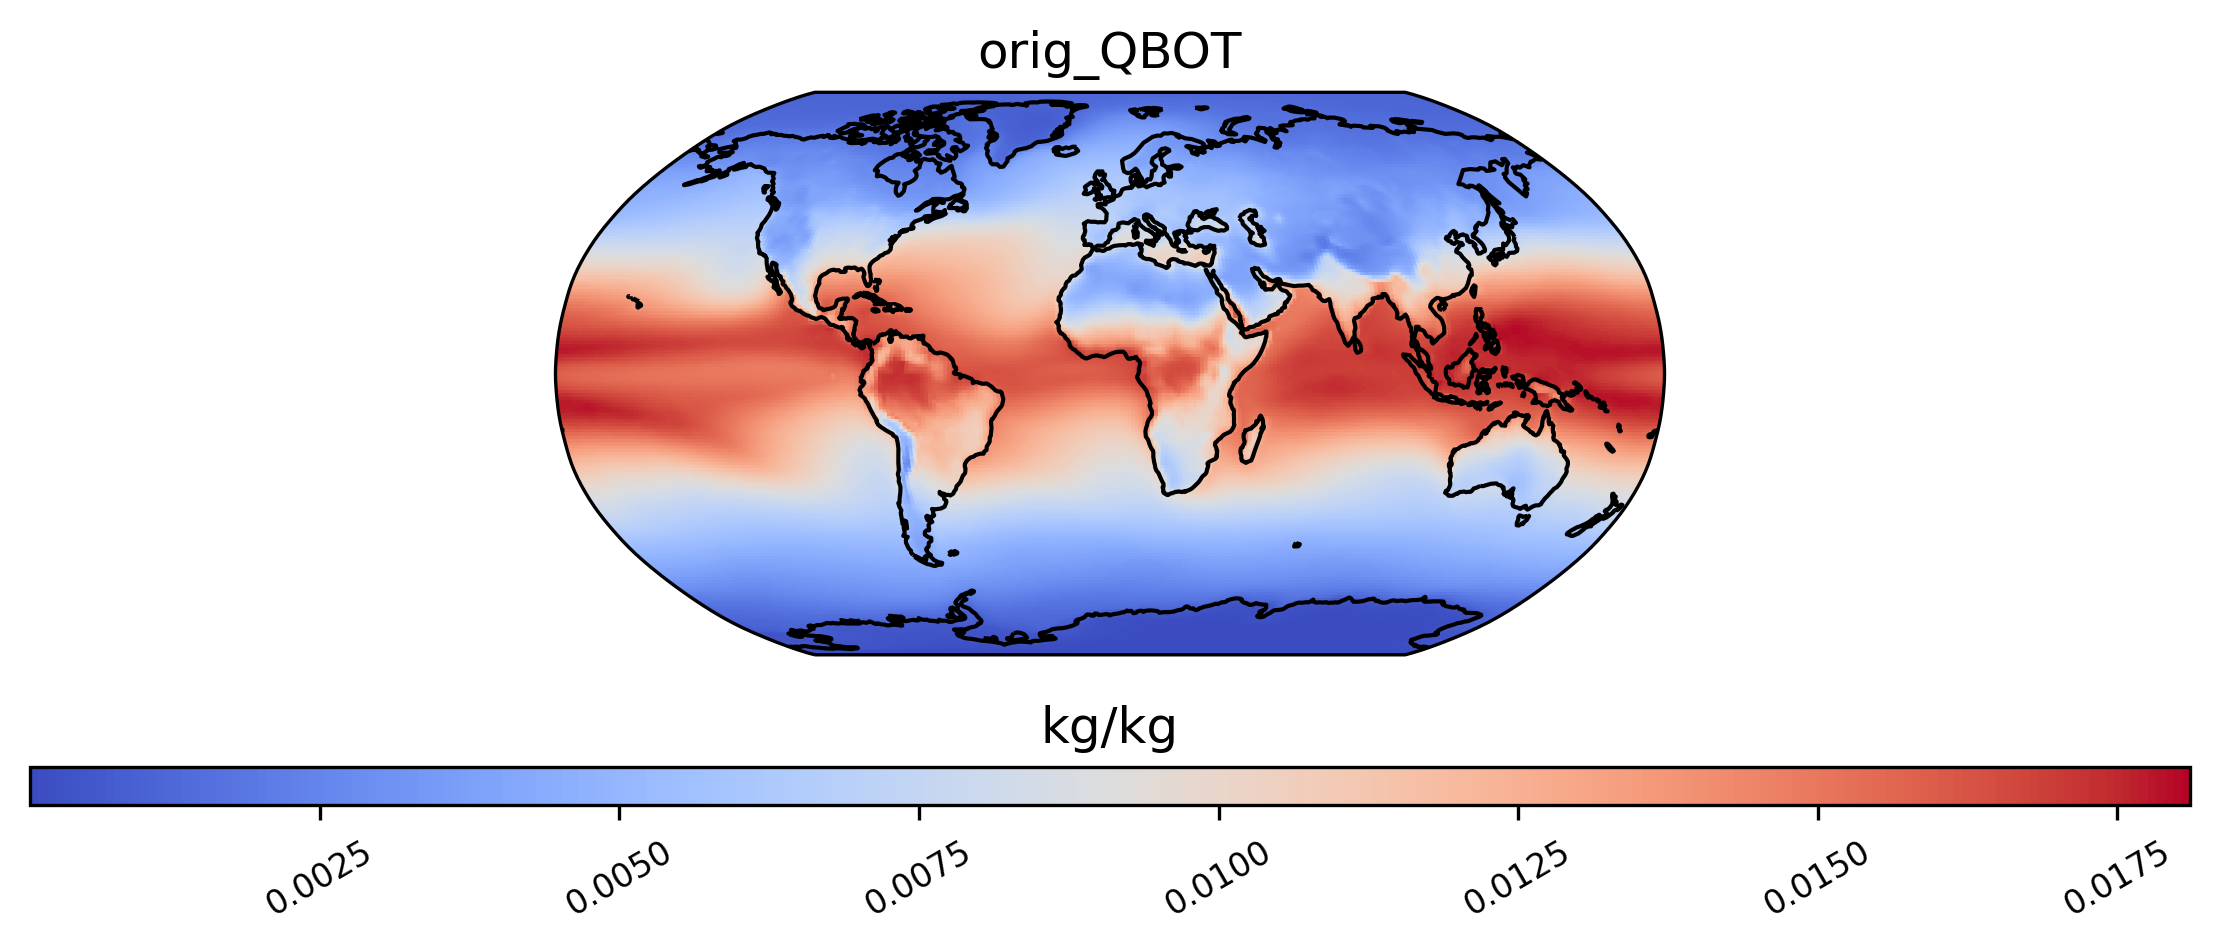

In [13]:
ldcpy.plot(cols_daily["QBOT"], sets=["orig_QBOT"], calc="mean", varname="QBOT", short_title=True)

In [6]:
cols_daily["TS"]

<xarray.Dataset>
Dimensions:     (collection: 1, time: 730, lat: 192, lon: 288)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-01-01 00:00:00 ... 2007-12-31 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U7 'orig_TS'
Data variables:
    TS          (collection, time, lat, lon) float32 dask.array<chunksize=(1, 700, 192, 288), meta=np.ndarray>
Attributes: (12/15)
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    ...               ...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu Mar 17 21:33:50 2022: ncks -d time,0,729,1 /glade/s...
    NCO:              netCDF Operators version 5.0.3 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv
    file_size:        {'orig_TS': 94048695}

In [7]:
for i in range(0,len(cols_daily)):
    for j in range(24,100):
        cur_ds = cols_daily[list(cols_daily.keys())[i]]
        lcr.batch_calcs(cur_ds, list(cols_daily.keys())[i],
                     "../data/daily_allvars_calcs.csv", calcs=["mean", "variance", "ns_con_var", "w_e_first_differences", "prob_positive", "num_zero", "range", "quantile"], set1=f"orig_{list(cols_daily.keys())[i]}",
                       time=j) 

Computing calculations for orig_bc_a1_SRF data (set1), time 24 :
Computing calculations for orig_bc_a1_SRF data (set1), time 25 :
Computing calculations for orig_bc_a1_SRF data (set1), time 26 :
Computing calculations for orig_bc_a1_SRF data (set1), time 27 :
Computing calculations for orig_bc_a1_SRF data (set1), time 28 :
Computing calculations for orig_bc_a1_SRF data (set1), time 29 :
Computing calculations for orig_bc_a1_SRF data (set1), time 30 :
Computing calculations for orig_bc_a1_SRF data (set1), time 31 :
Computing calculations for orig_bc_a1_SRF data (set1), time 32 :
Computing calculations for orig_bc_a1_SRF data (set1), time 33 :
Computing calculations for orig_bc_a1_SRF data (set1), time 34 :
Computing calculations for orig_bc_a1_SRF data (set1), time 35 :
Computing calculations for orig_bc_a1_SRF data (set1), time 36 :
Computing calculations for orig_bc_a1_SRF data (set1), time 37 :
Computing calculations for orig_bc_a1_SRF data (set1), time 38 :
Computing calculations fo

KilledWorker: ('open_dataset-ea671d5913cf4dd5a2b837445473b815gw-df4b95f4508cfbe2dc9fcf86c8544b21', <WorkerState 'tcp://10.148.9.223:36595', name: PBSCluster-0-3, memory: 0, processing: 1>)

In [ ]:

for var in daily_variables:
    ldcpy.plot(cols_daily[var], var, sets=[f"orig_{var}"], calc="mean", start=0, end=1)

In [17]:
keys = ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
        "PRECC", "PRECL", "PS", "QFLX", "SHFLX",
        "TMQ", "TS"]
for i in range(0,len(cols_monthly)):
    for j in range(0,60):
        cur_ds = cols_monthly[keys[i]]
        lcr.batch_calcs(cur_ds, keys[i],
                     "../data/monthly_calcs.csv", calcs=["mean", "variance", "ns_con_var"], set1=f"orig_{keys[i]}",
                       time=j) 

Computing calculations for orig_FLNS data (set1), time 0 :
Computing calculations for orig_FLNS data (set1), time 1 :
Computing calculations for orig_FLNS data (set1), time 2 :
Computing calculations for orig_FLNS data (set1), time 3 :
Computing calculations for orig_FLNS data (set1), time 4 :
Computing calculations for orig_FLNS data (set1), time 5 :
Computing calculations for orig_FLNS data (set1), time 6 :
Computing calculations for orig_FLNS data (set1), time 7 :
Computing calculations for orig_FLNS data (set1), time 8 :
Computing calculations for orig_FLNS data (set1), time 9 :
Computing calculations for orig_FLNS data (set1), time 10 :
Computing calculations for orig_FLNS data (set1), time 11 :
Computing calculations for orig_FLNS data (set1), time 12 :
Computing calculations for orig_FLNS data (set1), time 13 :
Computing calculations for orig_FLNS data (set1), time 14 :
Computing calculations for orig_FLNS data (set1), time 15 :
Computing calculations for orig_FLNS data (set1), 

IndexError: list index out of range

In [ ]:
cur_ds = cols_daily[list(cols_daily.keys())[1]]
cur_ds.sel(collection=f"orig_{list(cols_daily.keys())[1]}")

{'FLUT': <xarray.Dataset>
 Dimensions:     (collection: 1, time: 730, lat: 192, lon: 288)
 Coordinates:
   * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
   * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
   * time        (time) object 2006-01-01 00:00:00 ... 2007-12-31 00:00:00
     cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
   * collection  (collection) <U9 'orig_FLUT'
 Data variables:
     FLUT        (collection, time, lat, lon) float32 dask.array<chunksize=(1, 700, 192, 288), meta=np.ndarray>
 Attributes: (12/15)
     Conventions:      CF-1.0
     source:           CAM
     case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
     title:            UNSET
     logname:          mickelso
     host:             ys1023
     ...               ...
     topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
     history:          Mon May 10 15:24:38 2021: nc